<a href="https://colab.research.google.com/github/nineviolets/DataAnalyticsLab/blob/master/DT_Weather_188W1A0585.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn. datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
data=pd.read_csv('/content/sample_data/temp.csv')


In [ ]:
data.head(15)

,Weather,Temperature,Humidity,Wind,Golf Play
0,fine,hot,high,none,no
1,fine,hot,high,few,no
2,cloud,hot,high,none,yes
3,rain,warm,high,none,yes
4,rain,cold,medium,none,yes
5,rain,cold,medium,few,no
6,cloud,cold,medium,few,yes
7,fine,warm,high,none,no
8,fine,cold,medium,none,yes
9,rain,warm,medium,none,yes


In [ ]:
data.columns

Index(['Weather', 'Temperature', 'Humidity', 'Wind', 'Golf Play'], dtype='object')

In [ ]:
x=data.iloc[:,:4]

In [ ]:
x

,Weather,Temperature,Humidity,Wind
0,fine,hot,high,none
1,fine,hot,high,few
2,cloud,hot,high,none
3,rain,warm,high,none
4,rain,cold,medium,none
5,rain,cold,medium,few
6,cloud,cold,medium,few
7,fine,warm,high,none
8,fine,cold,medium,none
9,rain,warm,medium,none


In [ ]:
y=data.iloc[:,4]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7     no 
8     yes
9     yes
10    yes
11    yes
12    yes
13    no 
Name: Golf Play, dtype: object

In [ ]:
x=pd.get_dummies(x,drop_first=True)
x

,Weather_fine,Weather_rain,Temperature_hot,Temperature_warm,Humidity_medium,Wind_none,Wind_none
0,1,0,1,0,0,1,0
1,1,0,1,0,0,0,0
2,0,0,1,0,0,1,0
3,0,1,0,1,0,1,0
4,0,1,0,0,1,0,1
5,0,1,0,0,1,0,0
6,0,0,0,0,1,0,0
7,1,0,0,1,0,1,0
8,1,0,0,0,1,1,0
9,0,1,0,1,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y=l.fit_transform(y)

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [ ]:
clf=DecisionTreeClassifier(criterion='gini')

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data',accuracy_score
      (y_train,clf.predict(x_train)))
print('Accuracy score on test data',accuracy_score
      (y_test,pred))

Accuracy score on train data 1.0
Accuracy score on test data 0.6666666666666666


In [ ]:
clf1=DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred1=clf1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data',accuracy_score
      (y_train,clf1.predict(x_train)))
print('Accuracy score on test data',accuracy_score
      (y_test,pred1))

Accuracy score on train data 1.0
Accuracy score on test data 0.6666666666666666


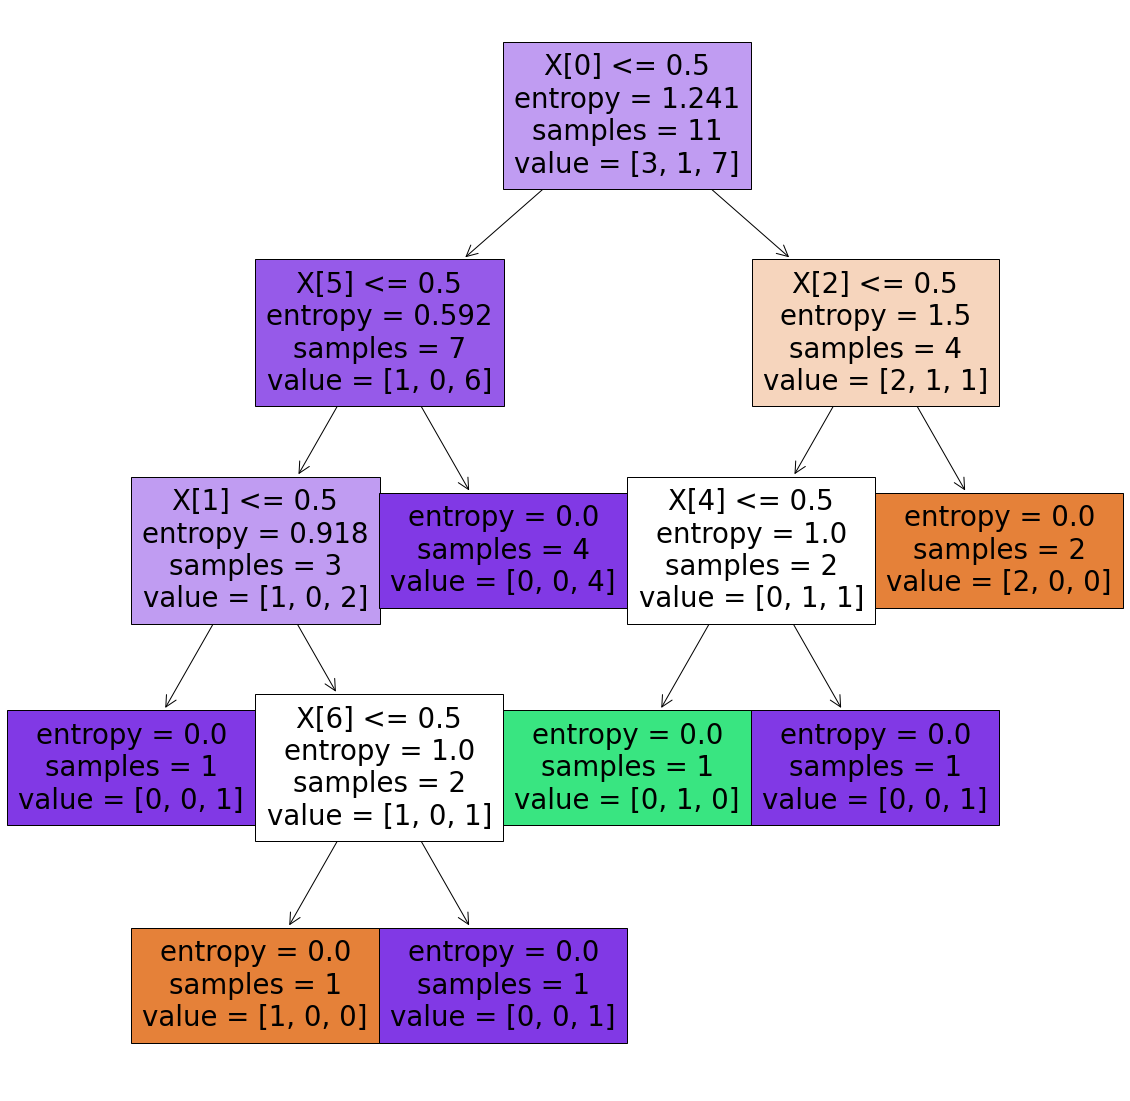

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
plot_tree(clf1,filled=True)
plt.show()